In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import sys
import time
import torch
import random
import scipy.io
import numpy as np
from pyDOE import lhs
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams["figure.max_open_warning"] = 4

In [23]:
### load local packages
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../.."))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.data.helmholtz import generate_dataset
from src.nn.dnn import DNN
from src.nn.pinn import PINN

## Global functions

In [18]:
if torch.cuda.is_available():
    """Cuda support"""
    print("cuda available")
    DEVICE = torch.device("cuda")
else:
    print("cuda not avail")
    DEVICE = torch.device("cpu")


def seed_torch(seed):
    """Seed initialization"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)


seed_torch(2341)
torch.cuda.empty_cache()

cuda available


## Data generation

In [20]:
nx, nt, t0, x0, X_r_train, X_u_train, u_train, Exact0, lbc, ubc = generate_dataset(
    DEVICE
)

X_r shape: (25600, 2)
X_u shape: (200, 2)
u shape: (200, 1)


In [14]:
model = PINN(X_u_train, u_train, X_r_train, nx, nt, t0, x0, Exact0, device="cpu")

/home/ubuntu/miniconda3/envs/pytorch-2.3.1-corona-pinn/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


## Training

In [ ]:
%%time
model.train() # RBA

In [ ]:
%%time
model.train() # SA

In [ ]:
%%time
model.train() # Vanilla

L2: 0.051100450855337806


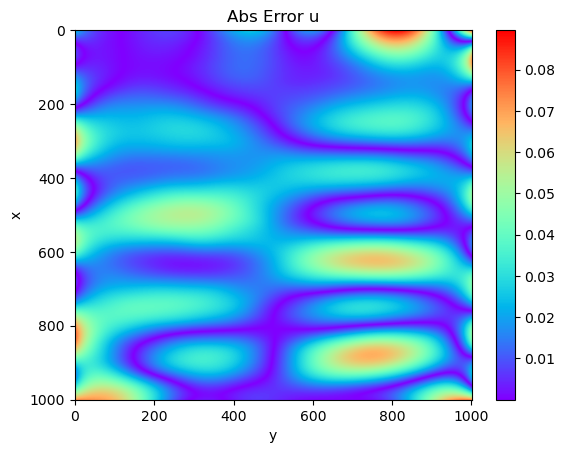

In [16]:
# Prediction
Exact = Exact0
X, T = np.meshgrid(x0, t0)
X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
u_pred = model.predict(X_star)
U_pred = np.reshape(u_pred, (Exact.shape[1], Exact.shape[0])).T
l2_rel = np.linalg.norm(Exact.flatten() - U_pred.flatten(), 2) / np.linalg.norm(
    Exact.flatten(), 2
)
print("L2:", l2_rel)

plt.figure(1)
plt.title("Abs Error u")
plt.xlabel("y")
plt.ylabel("x")
plt.imshow(np.abs(Exact - U_pred), aspect="auto", cmap="rainbow")
plt.colorbar()
plt.show()